<a href="https://colab.research.google.com/github/nicolassalomon96/procesamiento_imagenes_UNS/blob/main/TP3/Aritm%C3%A9tica_de_pixels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP3 - Aritmética de pixels

### Presentado: Nicolás Salomón - email: nicolassalomon96@gmail.com

### La actividad propuesta debe permitir seleccionar dos imágenes y con estas poder acceder a un menú que permita realizar las siguientes operaciones entre estas:
### En espacio RGB:
* Sumas y restas: clampeada y promediada

### Es espacio YIQ:
* Sumas y Restas: clampeada, promediada, if-ligther, if-darker

### El resultado de estas se debe guardar como una nueva imagen. Se deben mostrar los resultados de todas las operaciones mencionadas. 

### Nota: leer cuidadosamente en la teoría las pautas que debe tener cada una de estas operaciones. Las operaciones deben ser realizadas como funciones desarrolladas por ustedes NO mediante funciones de librerías que ya las realicen.

## 1. Se importan las librerias necesarias

In [66]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## 2. Funciones necesarias

In [141]:
#Función para descargar imagen
def get_image(path):
  image = io.imread(path)
  image = image/255
  return image

#Función para mostrar una imagen RGB
def print_image(image,title,figsize=(15,15)):
  fig, ax = plt.subplots(figsize=figsize)
  plt.imshow(image)
  plt.title(title)
  plt.show()

#Función para separar los canales R, G y B de una imagen
def split_RGB(image):
  '''
  input: image=arreglo numpy obtenido luego de leer una imagen
  output: R,G,B=matrices numpy de cada canal de la imagen
  '''
  R = image[:,:,0]
  G = image[:,:,1]
  B = image[:,:,2]
  return np.asarray(R), np.asarray(G), np.asarray(B)

#Funcion para crear un botón de guardado
def save_button(image,full_path):
  '''
  input: image=arreglo numpy obtenido luego de leer una imagen
         full_path=ruta completa de guardado (incluido nombre y extensión)
  '''
  #Función para guardar una imagen
  def save_image(image,full_path):
    image = np.uint8(image)
    io.imsave(full_path,image)
 
  my_button = widgets.Button(description='SAVE IMAGE')
  out = widgets.Output()

  def on_button_clicked(b):
     with out:
      #Que sucede al presionar el boton
      save_image(image,full_path)      
    
  my_button.on_click(on_button_clicked)
  display(my_button,out)

#Función para convertir una imagen del espacio RGB al YIQ
def rgb2yiq(RGB):
    '''
    input: matriz de la imagen en formato RGB normalizada
    output: matriz de la imagen en formato YIQ
    '''
    rgb2yiq_matrix = np.array([[0.299,0.587,0.114],[0.595716,-0.274453,-0.321263],[0.211456,-0.522591,0.311135]])
    #print("Matriz de conversion RGB a YIQ:")
    #print(rgb2yiq_matrix)

    #Se normalizan los valores de RGB entre 0.0 y 1.0
    #RGB = RGB/255

    Y = rgb2yiq_matrix[0][0] * RGB[:,:,0] + rgb2yiq_matrix[0][1] * RGB[:,:,1] + rgb2yiq_matrix[0][2] * RGB[:,:,2]
    I = rgb2yiq_matrix[1][0] * RGB[:,:,0] + rgb2yiq_matrix[1][1] * RGB[:,:,1] + rgb2yiq_matrix[1][2] * RGB[:,:,2]
    Q = rgb2yiq_matrix[2][0] * RGB[:,:,0] + rgb2yiq_matrix[2][1] * RGB[:,:,1] + rgb2yiq_matrix[2][2] * RGB[:,:,2]

    YIQ = np.dstack((Y,I,Q))
    
    return YIQ

#Función para convertir una imagen del espacio YIQ al RGB 
def yiq2rgb(YIQ):
    '''
    input: matriz de la imagen en formato YIQ 
    output: matriz de la imagen en formato RGB (en bytes)
    '''
    yiq2rgb_matrix = np.array([[1,0.9663,0.6210],[1,-0.2721,-0.6474],[1,-1.1070,1.7046]])
    #print("Matriz de conversion YIQ a RGB:")
    #print(yiq2rgb_matrix)

    R = yiq2rgb_matrix[0][0] * YIQ[:,:,0] + yiq2rgb_matrix[0][1] * YIQ[:,:,1] + yiq2rgb_matrix[0][2] * YIQ[:,:,2]
    G = yiq2rgb_matrix[1][0] * YIQ[:,:,0] + yiq2rgb_matrix[1][1] * YIQ[:,:,1] + yiq2rgb_matrix[1][2] * YIQ[:,:,2]
    B = yiq2rgb_matrix[2][0] * YIQ[:,:,0] + yiq2rgb_matrix[2][1] * YIQ[:,:,1] + yiq2rgb_matrix[2][2] * YIQ[:,:,2]

    #Se controla que no haya pixeles con valores menores a 0 y mayores a 1 (Dadas las multiplicaciones y sumas realizadas,
    #puede ocurrir que un valor exceda un poco el límite de 255 o sea ligeramente menor a 0 ocasionando errores en la visualización)
    R = np.clip(R, 0, 1)
    G = np.clip(G, 0, 1)
    B = np.clip(B, 0, 1)

    #Se convierten los valores a byte (valores enteros de 0 a 255)
    R = (R*255).astype(int)
    G = (G*255).astype(int)
    B = (B*255).astype(int)    
    
    RGB = np.dstack((R,G,B))
    
    return RGB  

#Función para implementar la suma clampeada de dos imágenes en el espacio RGB
def rgb_clamp_sum (image1, image2):
  #Separamos los canales de ambas imágenes
  R1, G1, B1 = split_RGB(image1)
  R2, G2, B2 = split_RGB(image2)

  R_new = R1 + R2
  R_new = np.clip(R_new, 0, 1)
  G_new = G1 + G2
  G_new = np.clip(G_new, 0, 1)
  B_new = B1 + B2
  B_new = np.clip(B_new, 0, 1)

  rgb_clampped_sum = np.dstack((R_new,G_new,B_new))
  return rgb_clampped_sum

#Función para implementar la suma y resta clampeada de dos imágenes en el espacio RGB
def rgb_clamp (image1, image2,operacion):
  #Separamos los canales de ambas imágenes
  R1, G1, B1 = split_RGB(image1)
  R2, G2, B2 = split_RGB(image2)

  if operacion=='suma':
    R_new = R1 + R2
    R_new = np.clip(R_new, 0, 1)
    G_new = G1 + G2
    G_new = np.clip(G_new, 0, 1)
    B_new = B1 + B2
    B_new = np.clip(B_new, 0, 1)

  if operacion=='resta':
    R_new = R1 - R2
    R_new = np.clip(R_new, 0, 1)
    G_new = G1 - G2
    G_new = np.clip(G_new, 0, 1)
    B_new = B1 - B2
    B_new = np.clip(B_new, 0, 1)

  rgb_clampped = np.dstack((R_new,G_new,B_new))
  return rgb_clampped

#Función para implementar la suma y resta promediada de dos imágenes en el espacio RGB
def rgb_avg (image1, image2,operacion):
  #Separamos los canales de ambas imágenes
  R1, G1, B1 = split_RGB(image1)
  R2, G2, B2 = split_RGB(image2)

  if operacion=='suma':
    R_new = (R1 + R2)/2
    R_new = np.clip(R_new, 0, 1)
    G_new = (G1 + G2)/2
    G_new = np.clip(G_new, 0, 1)
    B_new = (B1 + B2)/2
    B_new = np.clip(B_new, 0, 1)

  if operacion=='resta':
    R_new = (R1 - R2)/2
    R_new = np.clip(R_new, 0, 1)
    G_new = (G1 - G2)/2
    G_new = np.clip(G_new, 0, 1)
    B_new = (B1 - B2)/2
    B_new = np.clip(B_new, 0, 1)

  rgb_avg = np.dstack((R_new,G_new,B_new))
  return rgb_avg

#Función para implementar la suma y resta clampeada de dos imágenes en el espacio YIQ
def yiq_clamp (image1, image2, operacion):

  YIQ1 = rgb2yiq(image1)
  YIQ2 = rgb2yiq(image2)
  #Separamos los canales de ambas imágenes
  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  if operacion=='suma':
    Y_new = Y1 + Y2
    Y_new = np.clip(Y_new, 0, 1)
    I_new = ((I1*Y1 + I2*Y2)/(Y1+Y2))
    I_new = np.clip(I_new, -0.5926, 0.5926)
    Q_new = ((Q1*Y1 + Q2*Y2)/(Y1+Y2)) 
    Q_new = np.clip(Q_new, -0.5926, 0.5926)

  if operacion=='resta':
    Y_new = Y1 - Y2
    Y_new = np.clip(Y_new, 0, 1)
    I_new = ((I1*Y1 - I2*Y2)/(Y1+Y2))
    I_new = np.clip(I_new, -0.5926, 0.5926)
    Q_new = ((Q1*Y1 - Q2*Y2)/(Y1+Y2)) 
    Q_new = np.clip(Q_new, -0.5926, 0.5926)

  yiq_clampped = np.dstack((Y_new, I_new, Q_new))
  return yiq_clampped

#Función para implementar la suma y resta promediada de dos imágenes en el espacio YIQ
def yiq_avg (image1, image2, operacion):

  YIQ1 = rgb2yiq(image1)
  YIQ2 = rgb2yiq(image2)
  #Separamos los canales de ambas imágenes
  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  if operacion=='suma':
    Y_new = (Y1 + Y2)/2
    Y_new = np.clip(Y_new, 0, 1)
    I_new = ((I1*Y1 + I2*Y2)/(Y1+Y2))/2
    I_new = np.clip(I_new, -0.5926, 0.5926)
    Q_new = ((Q1*Y1 + Q2*Y2)/(Y1+Y2))/2
    Q_new = np.clip(Q_new, -0.5926, 0.5926)

  if operacion=='resta':
    Y_new = (Y1 - Y2)/2
    Y_new = np.clip(Y_new, 0, 1)
    I_new = ((I1*Y1 - I2*Y2)/(Y1+Y2))/2
    I_new = np.clip(I_new, -0.5926, 0.5926)
    Q_new = ((Q1*Y1 - Q2*Y2)/(Y1+Y2))/2
    Q_new = np.clip(Q_new, -0.5926, 0.5926)

  yiq_clampped = np.dstack((Y_new, I_new, Q_new))
  return yiq_clampped

#Función para implementar if-lighter en el espacio YIQ
def yiq_if_lighter (image1, image2):

  YIQ1 = rgb2yiq(image1)
  YIQ2 = rgb2yiq(image2)

  #Separamos los canales de ambas imágenes
  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  Y_new = np.zeros((len(Y1), len(Y1[0])))
  I_new = np.copy(Y_new)
  Q_new = np.copy(Y_new)

  for i in range(len(Y1)):
    for j in range(len(Y1[0])):
      if Y1[i,j] > Y2[i,j]:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j]= Q1[i,j]
      elif Y1[i,j] < Y2[i,j]:
        Y_new[i,j] = Y2[i,j]
        I_new[i,j] = I2[i,j]
        Q_new[i,j] = Q2[i,j]
      else:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j] = Q1[i,j]
  
  Y_new = np.clip(Y_new, 0, 1)
  I_new = np.clip(I_new, -0.5926, 0.5926)
  Q_new = np.clip(Q_new, -0.5926, 0.5926)
  yiq_lighter = np.dstack((Y_new, I_new, Q_new))

  return yiq_lighter

#Función para implementar la suma if-darker en el espacio YIQ
def yiq_if_darker (image1, image2):

  YIQ1 = rgb2yiq(image1)
  YIQ2 = rgb2yiq(image2)

  #Separamos los canales de ambas imágenes
  Y1, I1, Q1 = YIQ1[:,:,0], YIQ1[:,:,1], YIQ1[:,:,2]
  Y2, I2, Q2 = YIQ2[:,:,0], YIQ2[:,:,1], YIQ2[:,:,2]

  Y_new = np.zeros((len(Y1), len(Y1[0])))
  I_new = np.copy(Y_new)
  Q_new = np.copy(Y_new)

  for i in range(len(Y1)):
    for j in range(len(Y1[0])):
      if Y1[i,j] < Y2[i,j]:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j]= Q1[i,j]
      elif Y1[i,j] > Y2[i,j]:
        Y_new[i,j] = Y2[i,j]
        I_new[i,j] = I2[i,j]
        Q_new[i,j] = Q2[i,j]
      else:
        Y_new[i,j] = Y1[i,j]
        I_new[i,j] = I1[i,j]
        Q_new[i,j] = Q1[i,j]
  
  Y_new = np.clip(Y_new, 0, 1)
  I_new = np.clip(I_new, -0.5926, 0.5926)
  Q_new = np.clip(Q_new, -0.5926, 0.5926)
  yiq_darker = np.dstack((Y_new, I_new, Q_new))

  return yiq_darker

# 3. Selección de Imagenes

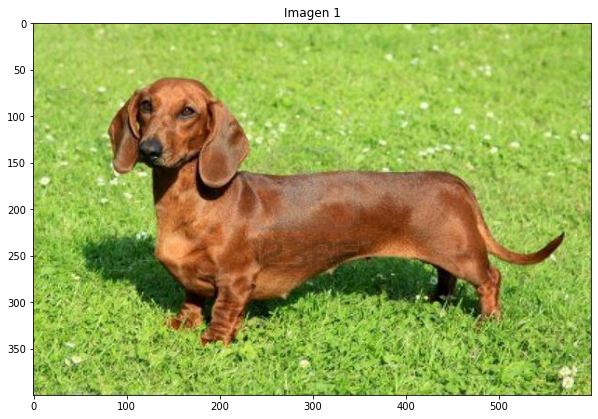

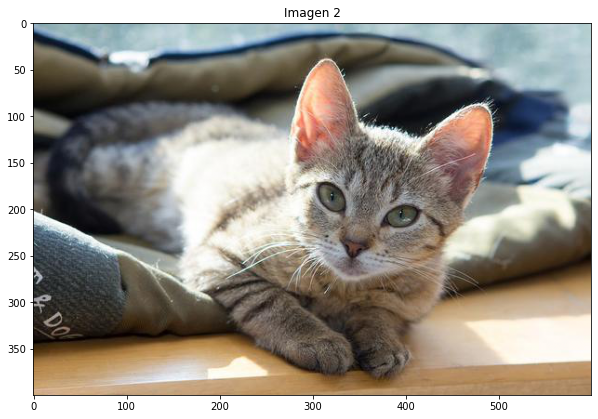

In [58]:
#@title Seleccione la imagen a analizar: { run: "auto" }
dog_url = 'https://pbs.twimg.com/media/BwURyszIYAEtRva.jpg'
cat_url = 'https://cdn.shopify.com/s/files/1/0268/6861/files/cat-4373086_960_720_grande.jpg?v=1576688425'
route_url = 'https://cdn1.eldia.com/122017/1514109535760.jpg'
lake_url = 'https://s1.1zoom.me/prev/596/USA_Mountains_Lake_Forests_Sky_Lake_Dillon_Clouds_595131_600x400.jpg'

Imagen1 = 'Perro' #@param ["Perro","Gato","Ruta","Lago"]
Imagen2 = 'Gato' #@param ["Perro","Gato","Ruta","Lago"]

if Imagen1 =='Perro':
  image1 = get_image(dog_url)
if Imagen1 =='Gato':
  image1 = get_image(cat_url)
if Imagen1 =='Ruta':
  image1 = get_image(route_url)
if Imagen1 =='Lago':
  image1 = get_image(lake_url)

if Imagen2 =='Perro':
  image2 = get_image(dog_url)
if Imagen2 =='Gato':
  image2 = get_image(cat_url)
if Imagen2 =='Ruta':
  image2 = get_image(route_url)
if Imagen2 =='Lago':
  image2 = get_image(lake_url)

print_image(image1,'Imagen 1',figsize=(10,10))
print_image(image2,'Imagen 2',figsize=(10,10))

# 4. Selección de operaciones a realizar

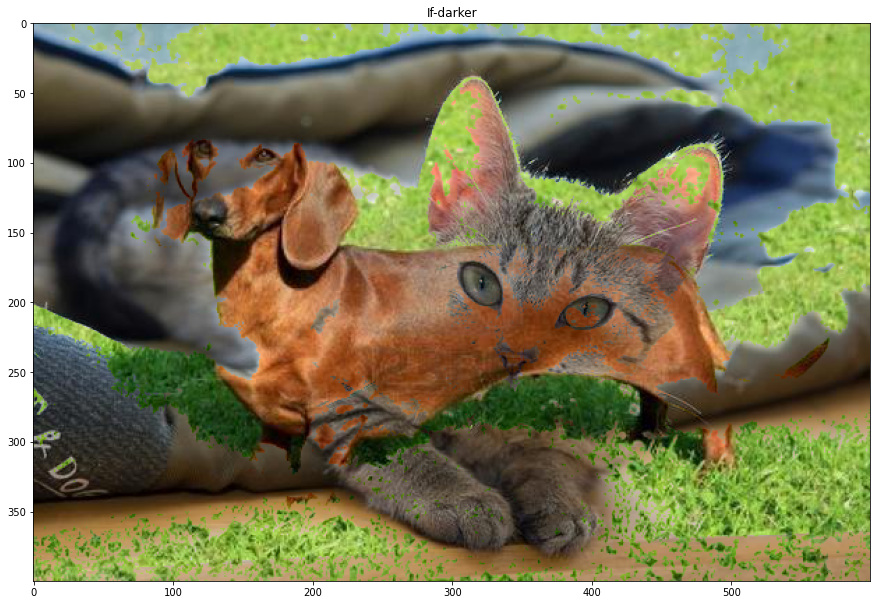

Button(description='SAVE IMAGE', style=ButtonStyle())

Output()

In [145]:
#@title Seleccione la operación a realizar { run: "auto" }
#@markdown Espacio de color:
Espacio = 'YIQ' #@param ["RGB","YIQ"]
Operación = 'if-darker' #@param ["suma","resta", "if-ligther", "if-darker"]
Tipo = 'promediada' #@param ["clampeada", "promediada"]
#@markdown Path para guardar la imagen modificada:
path = '/content/' #@param {type:"string"}
#@markdown Nombre para guardar la imagen modificada:
name = 'imagen_mod' #@param {type:"string"}
#@markdown Path para guardar la imagen modificada presione el botón SAVE IMAGE en la esquina inferior de la imagen
format = '.jpg' #@param [".jpg",".png"]
#@markdown Para guardar la imagen modificada presione el botón SAVE IMAGE en la esquina inferior de la imagen


if Espacio == 'RGB' and Operación == 'suma' and Tipo == 'clampeada':
  image_mod = rgb_clamp(image1, image2,'suma')
  print_image(image_mod,'Suma Clampeada RGB')

elif Espacio == 'RGB' and Operación == 'resta' and Tipo == 'clampeada':
  image_mod = rgb_clamp(image1, image2,'resta')
  print_image(image_mod,'Resta Clampeada RGB')

elif Espacio == 'RGB' and Operación == 'suma' and Tipo == 'promediada':
  image_mod = rgb_avg(image1, image2,'suma')
  print_image(image_mod,'Suma Promediada RGB')

elif Espacio == 'RGB' and Operación == 'resta' and Tipo == 'promediada':
  image_mod = rgb_avg(image1, image2,'resta')
  print_image(image_mod,'Resta Promediada RGB')

elif Espacio == 'YIQ' and Operación == 'suma' and Tipo == 'clampeada':
  yiq_image_mod = yiq_clamp(image1, image2,'suma')
  image_mod = yiq2rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  print_image(image_mod,'Suma Clampeada YIQ')

elif Espacio == 'YIQ' and Operación == 'resta' and Tipo == 'clampeada':
  yiq_image_mod = yiq_clamp(image1, image2,'resta')
  image_mod = yiq2rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  print_image(image_mod,'Resta Clampeada YIQ')

elif Espacio == 'YIQ' and Operación == 'suma' and Tipo == 'promediada':
  yiq_image_mod = yiq_avg(image1, image2,'suma')
  image_mod = yiq2rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  print_image(image_mod,'Suma Promediada YIQ')

elif Espacio == 'YIQ' and Operación == 'resta' and Tipo == 'promediada':
  yiq_image_mod = yiq_avg(image1, image2,'resta')
  image_mod = yiq2rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  print_image(image_mod,'Resta Promediada YIQ')

elif Espacio == 'YIQ' and Operación == 'if-ligther':
  yiq_image_mod = yiq_if_lighter(image1, image2)
  image_mod = yiq2rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  print_image(image_mod,'If-lighter')

elif Espacio == 'YIQ' and Operación == 'if-darker':
  yiq_image_mod = yiq_if_darker(image1, image2)
  image_mod = yiq2rgb(yiq_image_mod) #convierto a RGB para mostrar la imagen (la imagen no se modifica dado que son operaciones lineales)
  print_image(image_mod,'If-darker')

else:
  print("Función aritmética no disponible")

save_button(image_mod,Nombre)